# Homework 10

<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as ft

#### 1.  Create a vector, $\vec v$, which has 48 consecutive 0's, 32 consecutive 1's, and 48 consecutive 0's. Compute the autocorrelation of $\vec v$.  Describe the meaning of the results.<br>


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

128
(1024+1.9721522630525295e-31j)


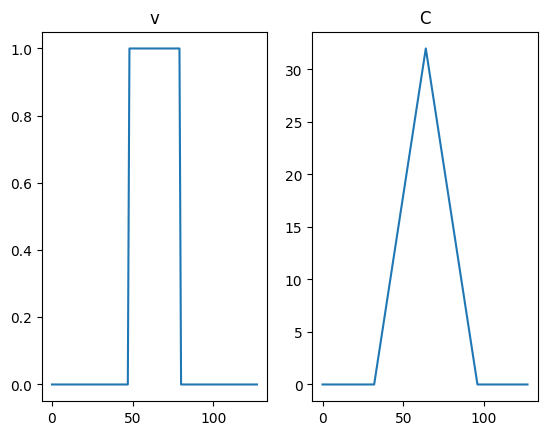

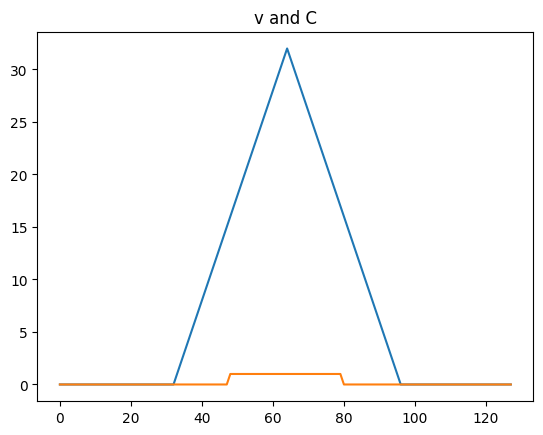

In [2]:
v = np.concatenate((np.zeros(48),np.ones(32),np.zeros(48)))
display(v); print(len(v)) #should be 128 digits long

def Correlate1D(A, B):
    a = ft.fft(A)
    b = ft.fft(B)
    c = a * b.conjugate( )
    C = ft.ifft(c)
    C = ft.fftshift(C)
    return C

C = Correlate1D(v,v)
print(sum(C))

fig, axs = plt.subplots(1, 2)
axs[0].plot(v)
axs[0].set_title('v')
axs[1].plot(np.abs(C))
axs[1].set_title('C')
plt.show()

plt.plot(C.real)
plt.plot(v)
plt.title('v and C')
plt.show()

In [3]:
print(np.argmax(C)) # the peak seen in C

64


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

448
(25600+2.68212707775144e-29j)


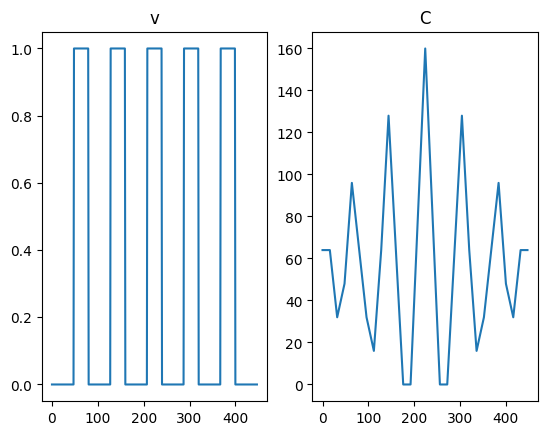

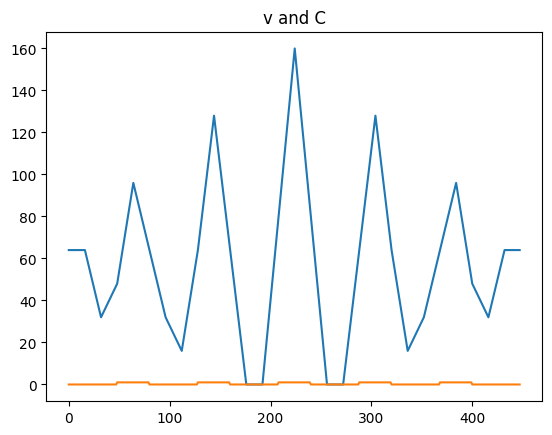

In [4]:
v = np.concatenate((np.zeros(48),np.ones(32),np.zeros(48),np.ones(32),np.zeros(48),np.ones(32),np.zeros(48),np.ones(32),np.zeros(48),np.ones(32),np.zeros(48)))
display(v); print(len(v))

def Correlate1D(A, B):
    a = ft.fft(A)
    b = ft.fft(B)
    c = a * b.conjugate()
    C = ft.ifft(c)
    C = ft.fftshift(C)
    return C

C = Correlate1D(v,v)
print(sum(C))

fig, axs = plt.subplots(1, 2)
axs[0].plot(v)
axs[0].set_title('v')
axs[1].plot(np.abs(C))
axs[1].set_title('C')
plt.show()

plt.plot(C.real)
plt.plot(v)
plt.title('v and C')
plt.show()

It appears that the spike in the Correlate1D plot occurs in the middle of where the pattern is in an autocorrelation.

#### 2.  Create two images both with a frame size of $256 \times 256$. In center of the first image, ${\bf a}[\vec x]$, create a solid circle of radius 64. In the center of the second image, ${\bf b}[\vec x]$, create a solid circle of radius 70. (Use Circle to generate these images.) Compute the correlation of ${\bf a}[\vec x]$ and ${\bf b}[\vec x]$.<br>

In [5]:
def Correlate2D(A, B):
    a = ft.fft2(A)
    b = ft.fft2(B)
    c = a * b.conjugate( )
    C = ft.ifft2(c)
    C = ft.fftshift(C)
    return C

def Circle(size, loc,rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1,b2 = np.indices(size)
    b1,b2 = b1-loc[0], b2-loc[1]
    mask = b1*b1 + b2*b2
    mask = (mask <= rad*rad).astype(int)
    return mask

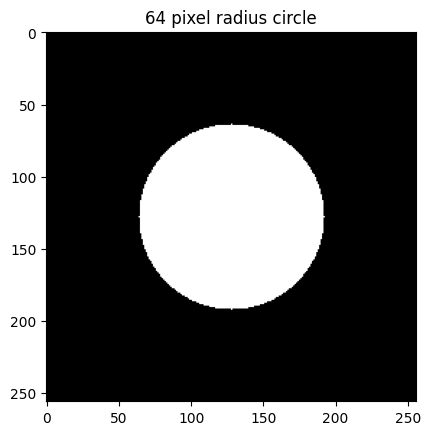

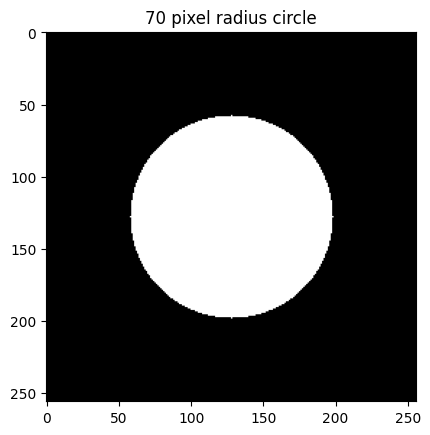

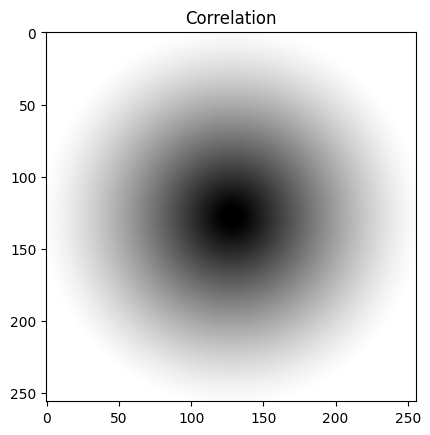

In [6]:
v,h = 256,256

amg = Circle((v,h),(v/2,h/2),64) #r=64
plt.imshow(amg, cmap='gray')
plt.title('64 pixel radius circle')
plt.show()

bmg = Circle((v,h),(v/2,h/2),70) #r=70
plt.imshow(bmg, cmap='gray')
plt.title('70 pixel radius circle')
plt.show()

cmg = Correlate2D(amg,bmg)
plt.imshow(-cmg.real, cmap='gray')
plt.title('Correlation')
plt.show()

#### 3.  Create an image with a frame size of $256 \times 256$. In center of the image, ${\bf a}[\vec x]$, create a solid circle of radius 64. Using the Fractional Power Filter code, calculate and display the circle image with an alpha equal 0.2.  Repeat with an alpha equal 0.7.  Repeat using the absolute value of the resulting image.  Discuss your results.<br>

In [7]:
#  Fractional Power Filter
import scipy.misc as sm
import scipy.fftpack as ft

def FPF(data, c, fp):
    # data is the incoming data... in rows : It is converted to columns here c is the constraint vector
    (N,Dim)= data.shape
    #X = transpose( data )# put vectors into columns

    # Compute D.  Best done in rows
    D = (np.power(abs(data), fp)).sum(0)
    D = D / N

    # it is possible that some values of D are 0 which will bomb out later
    ndx = (abs(D) < 0.001).nonzero()[0]
    D[ndx] = 0.001 * np.sign(D[ndx]+1e9)

    # Y is the modified X.  Also more efficient to compute from original data
    Y = data / np.sqrt(D)
    Y = Y.transpose()

    # compute Q
    Yc = Y.conjugate().transpose()
    Q = Yc.dot(Y)  # inner product

    if N == 1:  # only 1 training vector
        Q = 1./Q
    else:
        Q = np.linalg.inv(Q)

    Rc = Q.dot(c)
    H = Y.dot(Rc) / np.sqrt(D)
    # to test:  sum(conjugate(H[:,0]) * data[:,any] should equal c[any]
    return H

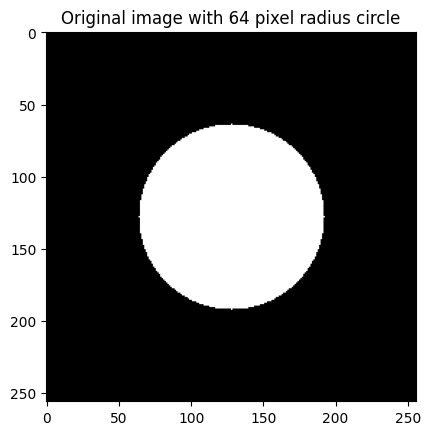

In [9]:
v,h = 256,256
amg = Circle((v,h),(v/2,h/2),64) #r=64

plt.imshow(amg, cmap='gray')
plt.title('Original image with 64 pixel radius circle')
plt.show()

V,H = amg.shape
Xt = np.zeros((1,V*H), complex)
Xt[0] = ft.fft2(amg).ravel()
cst = np.ones(1)

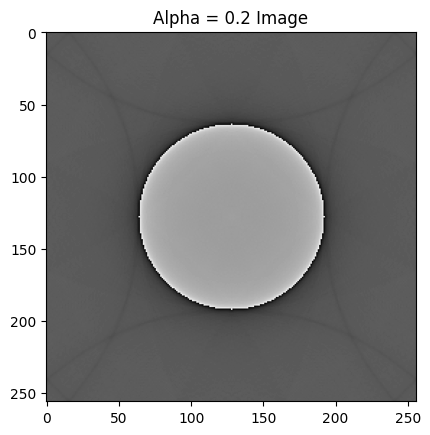

In [21]:
#alpha = 0.2
alpha = 0.2
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

plt.title('Alpha = 0.2 Image')
plt.imshow(filt.real, cmap='gray')
plt.show()
alpha02 = filt.real

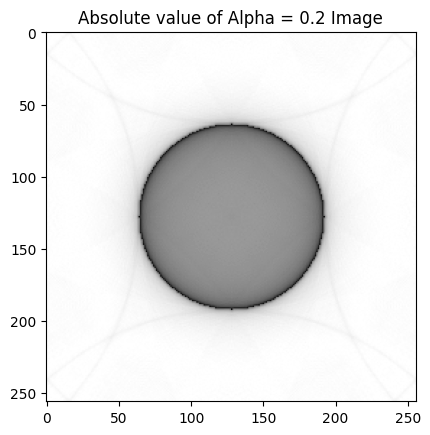

In [22]:
#absolute value of the image resulting from alpha = 0.2
alpha = 0.2
ffilt = FPF(Xt, cst, alpha)
filt = abs(ft.ifft2(ffilt.reshape(V,H)))

#print(filt.real[200,200])
plt.title('Absolute value of Alpha = 0.2 Image')
plt.imshow(-filt.real, cmap='gray')
plt.show()
absalpha02 = -filt.real

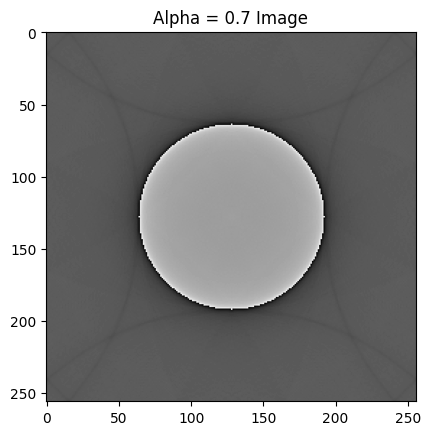

In [23]:
#alpha = 0.7
#alpha = 0.7
alpha = 0.2
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

plt.title('Alpha = 0.7 Image')
plt.imshow(filt.real, cmap='gray')
plt.show()
alpha07 = filt.real

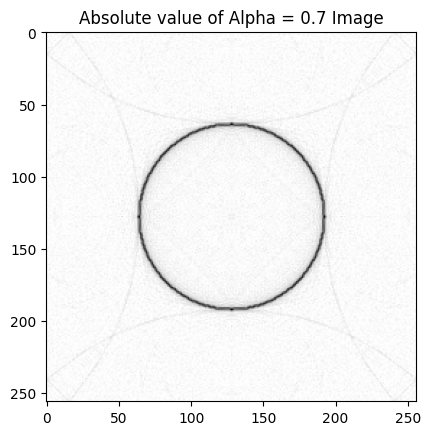

In [24]:
#absolute value of the image resulting from alpha = 0.7
alpha = 0.7
ffilt = FPF(Xt, cst, alpha)
filt = abs(ft.ifft2(ffilt.reshape(V,H)))

#print(filt.real[200,200])
plt.title('Absolute value of Alpha = 0.7 Image')
plt.imshow(-filt.real, cmap='gray')
plt.show()
absalpha07 = -filt.real

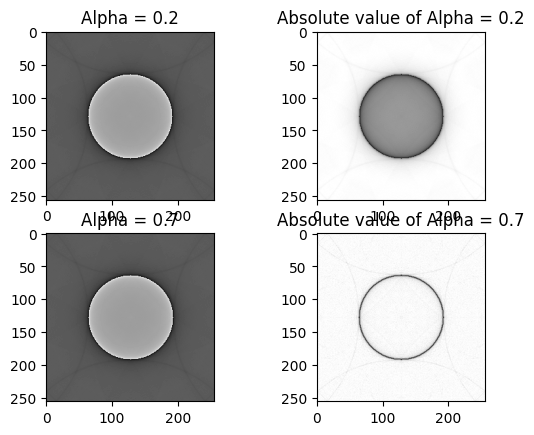

In [29]:
fig,axs = plt.subplots(2,2)
axs[0,0].imshow(alpha02, cmap='gray')
axs[0,0].set_title('Alpha = 0.2')
axs[0,1].imshow(absalpha02, cmap='gray')
axs[0,1].set_title('Absolute value of Alpha = 0.2')
axs[1,0].imshow(alpha07, cmap='gray')
axs[1,0].set_title('Alpha = 0.7')
axs[1,1].imshow(absalpha07, cmap='gray')
axs[1,1].set_title('Absolute value of Alpha = 0.7')
plt.show()

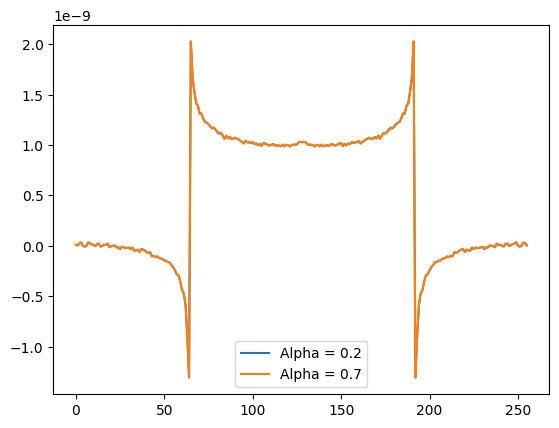

In [34]:
arr02 = alpha02[127,:]
arr07 = alpha07[127,:]

plt.plot(arr02, label = 'Alpha = 0.2')
plt.plot(arr07, label = 'Alpha = 0.7')
plt.legend()
plt.show()

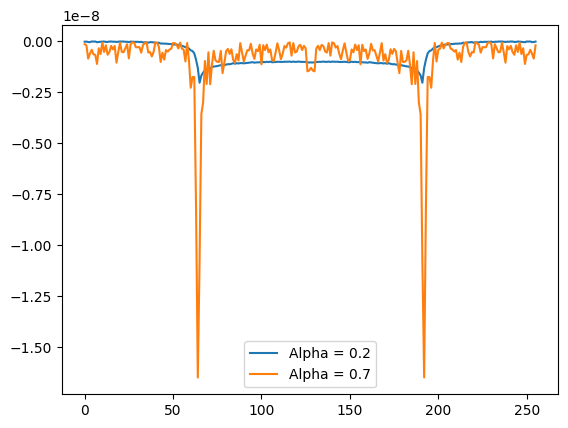

In [35]:
absarr02 = absalpha02[127,:]
absarr07 = absalpha07[127,:]

plt.plot(absarr02, label = 'Alpha = 0.2')
plt.plot(absarr07, label = 'Alpha = 0.7')
plt.legend()
plt.show()

It seems increasing the alpha from 0.2 to 0.7 does nothing when looking at the correlation not in terms of its absolute value. In terms of absolute value, when the alpha is increased from 0.2 to 0.7, the edge of the circle becomes significantly more pronounced to the point where I would consider the edge found. It seems taking the absolute value of the correlation almost seems to make the background go to white, but maintains the darkened outline of the circle. The inside of the circle turning into the same color as the background, as to make the shape's edge more obvious seems to be determined by changing the alpha.